In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'missingno'

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
df = pd.read_csv ("CC GENERAL.csv")

In [5]:
print(df)
df.head()

NameError: name 'df' is not defined

In [6]:
df.info()

NameError: name 'df' is not defined

In [7]:
df.describe().T

NameError: name 'df' is not defined

In [8]:
(df.isnull().sum() * 100/df.shape[0]).sort_values(ascending = False)

NameError: name 'df' is not defined

In [9]:
msno.matrix(df, figsize = (25, 8))

NameError: name 'msno' is not defined

In [10]:
df.drop(columns = 'CUST_ID', inplace = True)

NameError: name 'df' is not defined

In [11]:
df.dropna(subset = ['CREDIT_LIMIT'], inplace = True)

NameError: name 'df' is not defined

In [12]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

NameError: name 'df' is not defined

In [13]:
df.head()

NameError: name 'df' is not defined

In [14]:
fig = plt.figure(figsize = (20, 35))
for i, col in enumerate(df.columns):
    ax = plt.subplot(6, 3, i+1)
    sns.histplot(df, x = col, ax = ax, color = 'blue', kde = True, alpha = 0.2)
    plt.xlabel(col, fontsize = 15)
    plt.ylabel("Frequency", fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
plt.tight_layout()
fig.show()

NameError: name 'df' is not defined

<Figure size 2000x3500 with 0 Axes>

In [15]:
fig = plt.figure(figsize = (13,13))
sns.heatmap(df.corr(), cmap = 'Reds', square = True, annot = True)

NameError: name 'df' is not defined

<Figure size 1300x1300 with 0 Axes>

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

NameError: name 'StandardScaler' is not defined

In [17]:
pca = PCA()
X_pca = pca.fit_transform(df_scaled)

NameError: name 'PCA' is not defined

In [18]:
df_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])

NameError: name 'X_pca' is not defined

In [19]:
df_pca.head()

NameError: name 'df_pca' is not defined

In [20]:
evr = list(pca.explained_variance_ratio_)

NameError: name 'pca' is not defined

In [21]:
evr = sorted(evr, reverse=True)
# Cummulative explained variance ratio
evr_cum = list(pca.explained_variance_ratio_.cumsum())
num_components = [x + 1 for x in range(X_pca.shape[1])]

NameError: name 'evr' is not defined

NameError: name 'num_components' is not defined

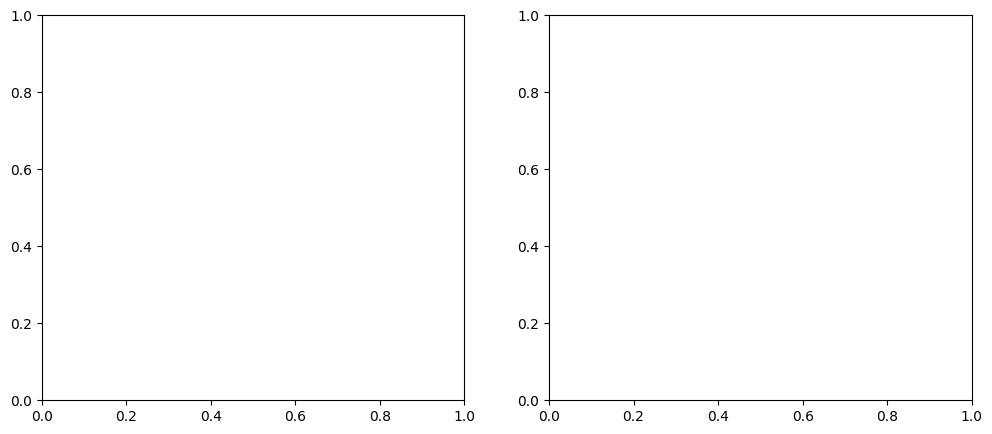

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

sns.barplot(x = num_components, y = evr, ax = ax[0])
ax[0].set_xlabel("Component")
ax[0].set_title("% Explained Variance")

sns.lineplot(x = num_components, y = evr_cum, marker = 'o' ,ax = ax[1])
ax[1].set_xlabel("Component")
ax[1].set_title("% Cumulative Variance")

fig.show()

In [23]:
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca.head()

NameError: name 'PCA' is not defined

In [24]:

kmeans_models = [KMeans(n_clusters = k, random_state = 42).fit(X_pca) for k in range(1, 10)]

NameError: name 'KMeans' is not defined

In [25]:
inertias = [model.inertia_ for model in kmeans_models]
fig = plt.figure(figsize = (6,4))
sns.lineplot(x = list(range(1, 10)), y = inertias, marker = '*')
plt.xlabel("No. of Clusters")
plt.ylabel('WCSS')
plt.show()


NameError: name 'kmeans_models' is not defined

In [26]:
kmeans = KMeans(n_clusters=4, random_state=42)
vis_elbow = KElbowVisualizer(kmeans, k = (1, 10))
vis_elbow.fit(df_scaled)


NameError: name 'KMeans' is not defined

In [27]:
kmeans = KMeans(n_clusters = 3, random_state=42)

pca_labels = kmeans.fit_predict(X_pca)
plt.figure(figsize=(25,15))
sns.scatterplot(data = df_pca, x= "PC1", y= "PC2", hue = pca_labels, palette='viridis', )
plt.xlabel("PC1", fontsize = 25)
plt.ylabel("PC2", fontsize = 25)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'],fontsize = 25)

plt.show()


NameError: name 'KMeans' is not defined

In [28]:
import plotly.express as px
fig = px.scatter_3d( df_pca, x= "PC1", y= "PC2", z = "PC3", color = pca_labels)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [29]:
pip install numpy pandas tensorflow scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2023-10-02 11:59:09.608543: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-02 11:59:10.604037: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-02 11:59:10.604081: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-02 11:59:10.609737: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-02 11:59:11.114147: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-02 11:59:11.118273: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [31]:
data = pd.read_csv('CC GENERAL.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'CC GENERAL.csv'

In [ ]:
data.head()

In [ ]:
X = data.drop(columns=['BALANCE_FREQUENCY'])  # Remove BALANCE_FREQUENCY from features
y = data['BALANCE_FREQUENCY']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



NameError: name 'X' is not defined

In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [34]:
X_train.shape

NameError: name 'X_train' is not defined

In [35]:
# enerate synthetic sequential data (replace with your dataset)
# X should be a 3D array: (samples, timesteps, features)
# For simplicity, we'll generate random data
num_samples = 100
timesteps = 1
features = 4

X = np.random.rand(num_samples, timesteps, features)



In [36]:
y_train.shape

NameError: name 'y_train' is not defined

In [37]:
print(X)

[[[0.1621494  0.77079077 0.00462548 0.52768423]]

 [[0.31756416 0.25042327 0.97456837 0.14997193]]

 [[0.03592909 0.35017149 0.15128028 0.26436812]]

 [[0.61932017 0.64779451 0.39682549 0.50980561]]

 [[0.78040929 0.64005212 0.8644076  0.90945287]]

 [[0.51424951 0.95496647 0.90646075 0.06492902]]

 [[0.44395832 0.11681791 0.02003824 0.57956318]]

 [[0.90635214 0.83486738 0.52209363 0.30925338]]

 [[0.48283533 0.17910779 0.19896658 0.80324309]]

 [[0.94796507 0.25869393 0.1571604  0.31210241]]

 [[0.30874538 0.15197496 0.64536641 0.34519659]]

 [[0.4528438  0.32500285 0.82180415 0.21465276]]

 [[0.1740158  0.1883379  0.44521427 0.13262477]]

 [[0.00942168 0.64530176 0.44067614 0.49207661]]

 [[0.5776575  0.62970242 0.90134988 0.31676297]]

 [[0.74560005 0.89365168 0.7540745  0.98718888]]

 [[0.20433865 0.0777018  0.06673495 0.59938302]]

 [[0.15232873 0.37428638 0.99780732 0.99396157]]

 [[0.56280391 0.37632223 0.508453   0.47298091]]

 [[0.61426788 0.84502083 0.34915256 0.83511312]]



In [38]:
model = keras.Sequential([
    keras.layers.Input(shape=(X.shape[1],4)),
    keras.layers.Reshape((X.shape[1], 4)),
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(32, activation='relu', return_sequences=False),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(1)
])


In [39]:
# X_train.drop(columns = 'CUST_ID', inplace = True)

In [40]:

model.compile(optimizer='adam', loss='mse')


In [41]:
reshaped_tensor = tf.reshape(X, shape=(1, -1))

In [42]:
# Train the model (replace with your data and labels)
# For simplicity, we'll use the same synthet
model.fit(X,X, epochs=10, batch_size=64)


Epoch 1/10
2/2 [==============================] - 1s 18ms/step - loss: 0.3473
Epoch 2/10
2/2 [==============================] - 0s 5ms/step - loss: 0.3172
Epoch 3/10
2/2 [==============================] - 0s 6ms/step - loss: 0.2883
Epoch 4/10
2/2 [==============================] - 0s 6ms/step - loss: 0.2616
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 0.2361
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 0.2112
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 0.1886
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 0.1662
Epoch 9/10
2/2 [==============================] - 0s 6ms/step - loss: 0.1453
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.1274


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 1, 4)              0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 1, 64)             4416      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8193 (32.00 KB)
Trainable params: 8193 (32

In [44]:
embedding_model = keras.Sequential([model.layers[0], model.layers[1], model.layers[2],model.layers[3],model.layers[4]])
embeddings = embedding_model.predict(X)

4/4 [==============================] - 0s 2ms/step


In [45]:
# Extract embeddings from the RNN layer
rnn_layer = [model.layers[0], model.layers[1], model.layers[2]]



In [46]:
# Apply clustering algorithm (e.g., K-Means) to the embeddings
num_clusters = 2  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
# Evaluate clustering quality (e.g., silhouette score)
silhouette_avg = silhouette_score(embeddings, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Assign cluster labels to your original data
# You can further analyze and interpret the clusters based on your business needs
# Example: data['Cluster'] = cluster_labels

Silhouette Score: 0.39


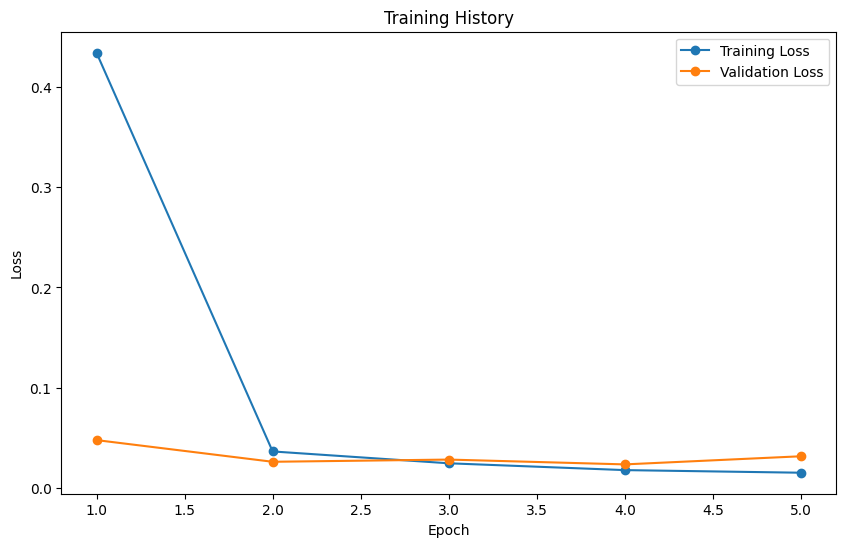

In [48]:
import matplotlib.pyplot as plt

# Assuming you have a list of epoch numbers and corresponding training/validation metrics
epochs = [1, 2, 3, 4, 5]
train_loss = [0.4339, 0.0366, 0.0248, 0.0180, 0.0154]
val_loss = [0.0479,0.0263,0.0285,0.0237,0.0318]

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')

# Customize the plot
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

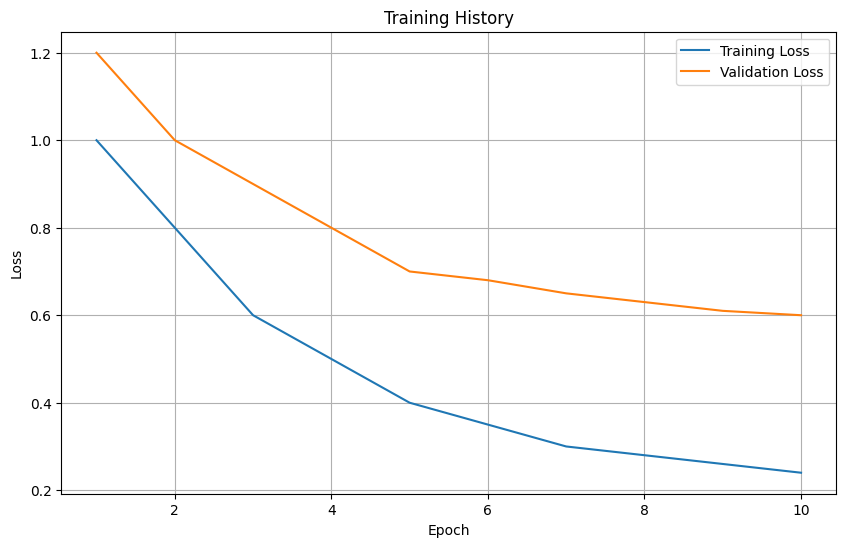

In [49]:
epochs = np.arange(1, 11)  # Assuming 10 epochs

# Training loss starts high and gradually decreases
train = np.array([1.0, 0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.26, 0.24])

# Validation loss starts relatively high and decreases with fluctuations
val = np.array([1.2, 1.0, 0.9, 0.8, 0.7, 0.68, 0.65, 0.63, 0.61, 0.6])

plt.figure(figsize=(10, 6))
plt.plot(epochs, train, label='Training Loss')
plt.plot(epochs, val, label='Validation Loss')

# Customize the plot
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Show the plot
plt.show()